# Examples 

The examples use the `ZTest` class, but usage of `ChiSquared` and `StudentsTTest` is identical.

To analyse a complete experiment using several different methods use the `Experiment` class which takes a `method_column`. Available options: 'z-test', 'chi-squared', 't-test', 'z-test-linreg' and 'bootstrap'.

Different methods require different input. Examples of how to use 'z-test-linreg' and 'bootstrap' to come!

In [1]:
import pandas as pd
import spotify_confidence as conf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## One categorical

In [2]:
df = pd.DataFrame({'variation_name': ['test', 'test', 'control', 'control', 'test2', 'test2', 'test3', 'test3'],
                   'success': [50, 60, 40, 140, 10, 20, 20, 20],
                   'total': [100, 100, 100, 200, 50, 50, 60, 60],
                   'country': ['us', 'ca', 'us', 'ca', 'us', 'ca', 'us', 'ca'],
                   'non_inferiority_margin': [0.02, 0.1, 0.02, 0.1, 0.02, 0.1, 0.02, 0.1],
                   'preferred_direction': ['increase', 'decrease', 'increase', 'decrease', 'increase', 'decrease', 'increase', 'decrease']})
df.head()

,variation_name,success,total,country,non_inferiority_margin,preferred_direction
0,test,50,100,us,0.02,increase
1,test,60,100,ca,0.10,decrease
2,control,40,100,us,0.02,increase
3,control,140,200,ca,0.10,decrease
4,test2,10,50,us,0.02,increase


In [3]:
ztest = conf.ZTest(data_frame=df,
                   numerator_column='success',
                   numerator_sum_squares_column='success',
                   denominator_column='total',
                   categorical_group_columns=['variation_name', 'country'],
                   interval_size=0.99,
                   correction_method='bonferroni')

ztest.summary()

,variation_name,country,success,total,point_estimate,ci_lower,ci_upper
0,test,us,50,100,0.500000,0.371209,0.628791
1,test,ca,60,100,0.600000,0.473811,0.726189
2,control,us,40,100,0.400000,0.273811,0.526189
3,control,ca,140,200,0.700000,0.616534,0.783466
4,test2,us,10,50,0.200000,0.054289,0.345711
5,test2,ca,20,50,0.400000,0.221541,0.578459
6,test3,us,20,60,0.333333,0.176573,0.490093
7,test3,ca,20,60,0.333333,0.176573,0.490093


In [4]:
ztest.difference(level_1=('control', 'us'), level_2=('test', 'ca'))

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant,powered_effect,required_sample_size
0,"(control, us)","(test, ca)",True,0.2,0.021541,0.378459,0.003892,0.021541,0.378459,0.003892,True,0.235115,None


In [5]:
ztest.multiple_difference(level='control', groupby='country', level_as_reference=True)

,country,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,powered_effect,required_sample_size,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant
0,ca,control,test,True,-0.100000,-0.251296,0.051296,8.865923e-02,0.182453,None,-0.284667,0.084667,5.319554e-01,False
1,ca,control,test2,True,-0.300000,-0.497013,-0.102987,8.769942e-05,0.208000,None,-0.540468,-0.059532,5.261965e-04,True
2,ca,control,test3,True,-0.366667,-0.544263,-0.189071,1.048644e-07,0.201444,None,-0.583435,-0.149898,6.291862e-07,True
3,us,control,test,True,0.100000,-0.080308,0.280308,1.531275e-01,0.271153,None,-0.120079,0.320079,9.187647e-01,False
4,us,control,test2,True,-0.200000,-0.392757,-0.007243,7.526315e-03,0.322173,None,-0.435274,0.035274,4.515789e-02,False
5,us,control,test3,True,-0.066667,-0.267906,0.134573,3.934818e-01,0.306058,None,-0.312294,0.178961,1.000000e+00,False


In [6]:
ztest.multiple_difference(level=('control', 'us'), level_as_reference=True)

,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,powered_effect,required_sample_size,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant
0,"(control, us)","(control, ca)",True,0.300000,0.148704,0.451296,3.263814e-07,0.240496,None,0.112700,0.487300,0.000002,True
1,"(control, us)","(test, ca)",True,0.200000,0.021541,0.378459,3.892417e-03,0.273344,None,-0.020928,0.420928,0.027247,False
2,"(control, us)","(test, us)",True,0.100000,-0.080308,0.280308,1.531275e-01,0.273344,None,-0.123217,0.323217,1.000000,False
3,"(control, us)","(test2, ca)",True,0.000000,-0.218566,0.218566,1.000000e+00,0.323641,None,-0.270580,0.270580,1.000000,False
4,"(control, us)","(test2, us)",True,-0.200000,-0.392757,-0.007243,7.526315e-03,0.323641,None,-0.438629,0.038629,0.052684,False
5,"(control, us)","(test3, ca)",True,-0.066667,-0.267906,0.134573,3.934818e-01,0.308341,None,-0.315797,0.182463,1.000000,False
6,"(control, us)","(test3, us)",True,-0.066667,-0.267906,0.134573,3.934818e-01,0.308341,None,-0.315797,0.182463,1.000000,False


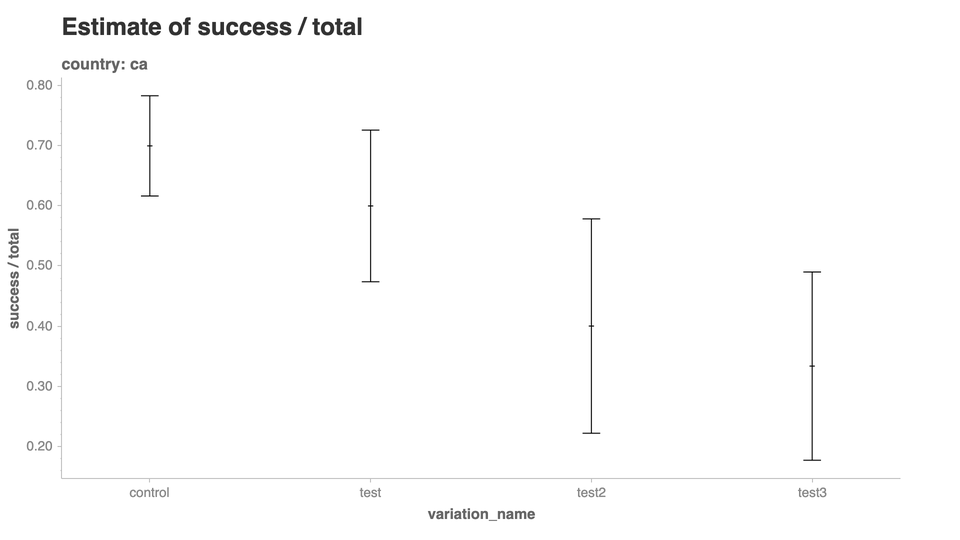

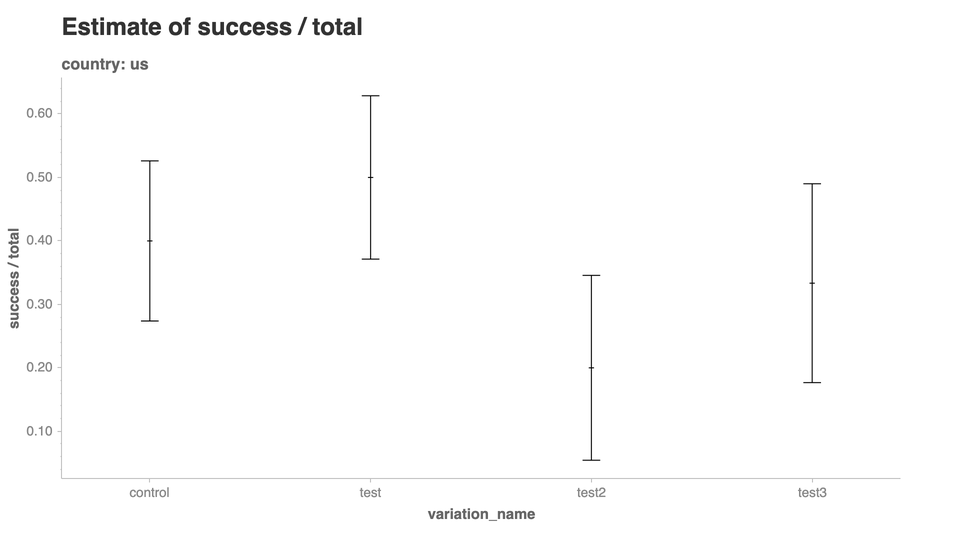

In [7]:
ztest.summary_plot(groupby='country').show('png') # Use html instead of png for interactive graphs

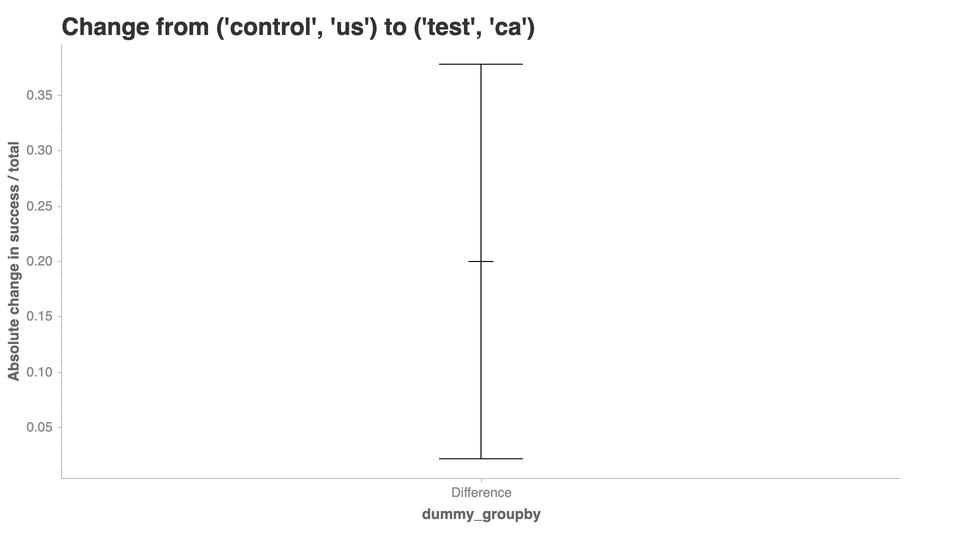

In [8]:
ztest.difference_plot(level_1=('control', 'us'), level_2=('test', 'ca')).show('png')

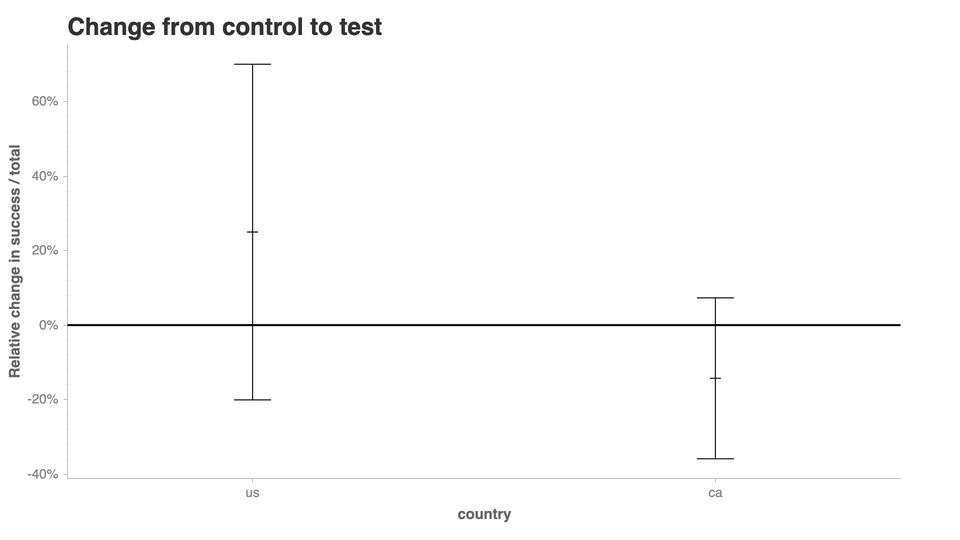

In [9]:
ztest.difference_plot(level_1='control', level_2='test', groupby='country', absolute=False).show('png')

### Difference plot with non-inferiority margins

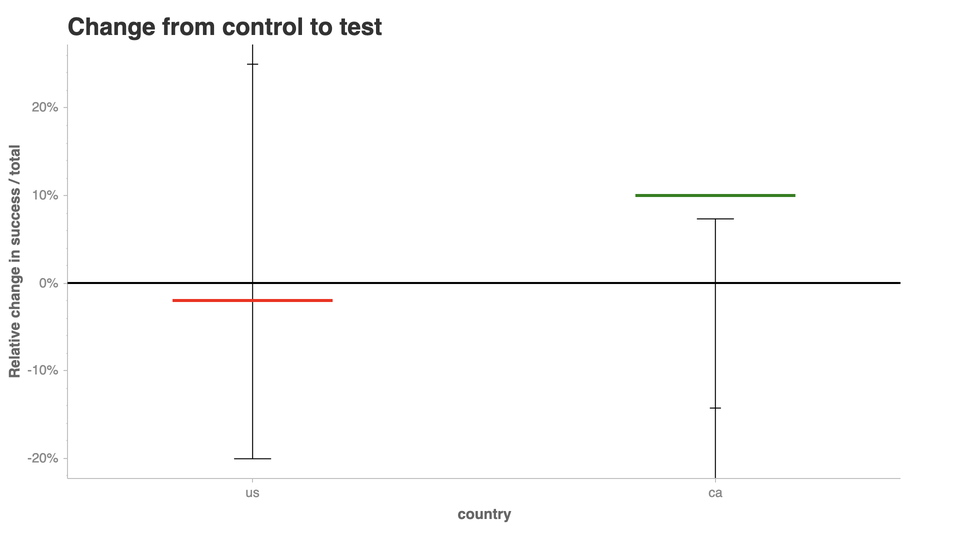

,country,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant,powered_effect,required_sample_size,non-inferiority margin,null_hypothesis,preference
0,ca,control,test,False,-0.142857,-inf,0.052346,0.001900,-inf,0.07328,0.003800,True,0.274006,2253.0,0.10,0.10,decrease
1,us,control,test,False,0.250000,-0.157111,inf,0.061433,-0.20077,inf,0.122865,False,0.591920,175186.0,0.02,-0.02,increase


In [10]:
ztest.difference_plot(level_1='control', 
                      level_2='test', 
                      groupby='country', 
                      absolute=False, 
                      non_inferiority_margins=True,
                      use_adjusted_intervals=True).show('png')
ztest.difference(level_1='control', 
                 level_2='test', 
                 groupby='country', 
                 absolute=False, 
                 non_inferiority_margins=True)

#### You can also pass in non-inforiority margins as a dict of tuples, or even a singe tuple if you want to use the same nims for all groups

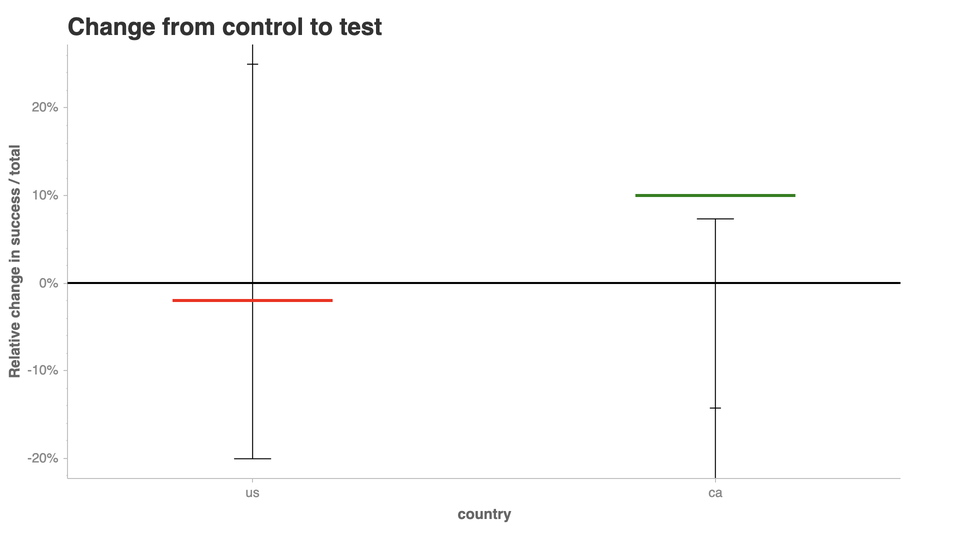

,country,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant,powered_effect,required_sample_size,non-inferiority margin,null_hypothesis,preference
0,ca,control,test,False,-0.142857,-inf,0.052346,0.001900,-inf,0.07328,0.003800,True,0.274006,2253.0,0.10,0.10,decrease
1,us,control,test,False,0.250000,-0.157111,inf,0.061433,-0.20077,inf,0.122865,False,0.591920,175186.0,0.02,-0.02,increase


In [11]:
ztest.difference_plot(level_1='control', 
                      level_2='test', 
                      groupby='country', 
                      absolute=False, 
                      non_inferiority_margins={'us':(0.02, 'increase'), 'ca':(0.1, 'decrease')},
                      use_adjusted_intervals=True).show('png')
ztest.difference(level_1='control', 
                 level_2='test', 
                 groupby='country', 
                 absolute=False, 
                 non_inferiority_margins={'us':(0.02, 'increase'), 'ca':(0.1, 'decrease')})

### Ztest - Ordinal + categorical

In [12]:
df = pd.DataFrame(
            {'variation_name': ['test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2',
                                'test', 'control', 'test2', ],
             'nr_of_items': [500, 8, 100,
                             510, 8, 100,
                             520, 9, 104,
                             530, 7, 100,
                             530, 8, 103,
                             500, 8, 100,
                             510, 8, 100,
                             520, 9, 104,
                             530, 7, 100,
                             530, 8, 103, ],
             'nr_of_items_sumsq': [1010, 32, 250,
                                   1000, 30, 253,
                                   1030, 33, 254,
                                   1000, 30, 250,
                                   1040, 31, 255,
                                   1010, 22, 150,
                                   1000, 20, 153,
                                   1030, 23, 154,
                                   1000, 20, 150,
                                   1040, 21, 155, ],
             'users': [2010, 42, 250,
                       2000, 40, 253,
                       2030, 43, 254,
                       2000, 40, 250,
                       2040, 41, 255,
                       1010, 22, 150,
                       1000, 20, 153,
                       1030, 23, 154,
                       1000, 20, 150,
                       1040, 21, 155, ],
             'days_since_reg': [1, 1, 1,
                                2, 2, 2,
                                3, 3, 3,
                                4, 4, 4,
                                5, 5, 5,
                                1, 1, 1,
                                2, 2, 2,
                                3, 3, 3,
                                4, 4, 4,
                                5, 5, 5],
             'country': ['us', 'us', 'us', 'us', 'us', 'us', 'us',
                         'us', 'us', 'us', 'us', 'us', 'us', 'us',
                         'us',
                         'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb',
                         'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb',
                         'gb', ]})

ztest_ord = conf.ZTest(df,
                       numerator_column='nr_of_items',
                       numerator_sum_squares_column='nr_of_items_sumsq',
                       denominator_column='users',
                       categorical_group_columns=['variation_name', 'country'],
                       ordinal_group_column='days_since_reg',
                       correction_method='bonferroni')

ttest = conf.StudentsTTest(df,
                           numerator_column='nr_of_items',
                           numerator_sum_squares_column='nr_of_items_sumsq',
                           denominator_column='users',
                           categorical_group_columns=['variation_name', 'country'],
                           ordinal_group_column='days_since_reg')

In [13]:
ztest_ord.multiple_difference(level = 'control', groupby=['country', 'days_since_reg'], level_as_reference=False)

,country,days_since_reg,level_1,level_2,absolute_difference,difference,ci_lower,ci_upper,p-value,powered_effect,required_sample_size,adjusted ci_lower,adjusted ci_upper,adjusted p-value,is_significant
0,gb,1,test,control,True,-0.131413,-0.533423,0.270597,0.521722,0.724070,None,-0.751534,0.488707,1,False
1,gb,1,test2,control,True,-0.303030,-0.719036,0.112976,0.153381,0.659886,None,-0.944740,0.338680,1,False
2,gb,2,test,control,True,-0.110000,-0.525545,0.305545,0.603882,0.751163,None,-0.750999,0.530999,1,False
3,gb,2,test2,control,True,-0.253595,-0.682908,0.175718,0.246966,0.697812,None,-0.915831,0.408642,1,False
4,gb,3,test,control,True,-0.113550,-0.501696,0.274596,0.566389,0.703723,None,-0.712284,0.485184,1,False
5,gb,3,test2,control,True,-0.284020,-0.685931,0.117890,0.166035,0.639288,None,-0.903988,0.335947,1,False
6,gb,4,test,control,True,-0.180000,-0.604476,0.244476,0.405902,0.740529,None,-0.834775,0.474775,1,False
7,gb,4,test2,control,True,-0.316667,-0.754545,0.121212,0.156362,0.688059,None,-0.992116,0.358783,1,False
8,gb,5,test,control,True,-0.128663,-0.537240,0.279914,0.537101,0.733309,None,-0.758914,0.501588,1,False
9,gb,5,test2,control,True,-0.283564,-0.705616,0.138488,0.187892,0.673770,None,-0.934600,0.367472,1,False


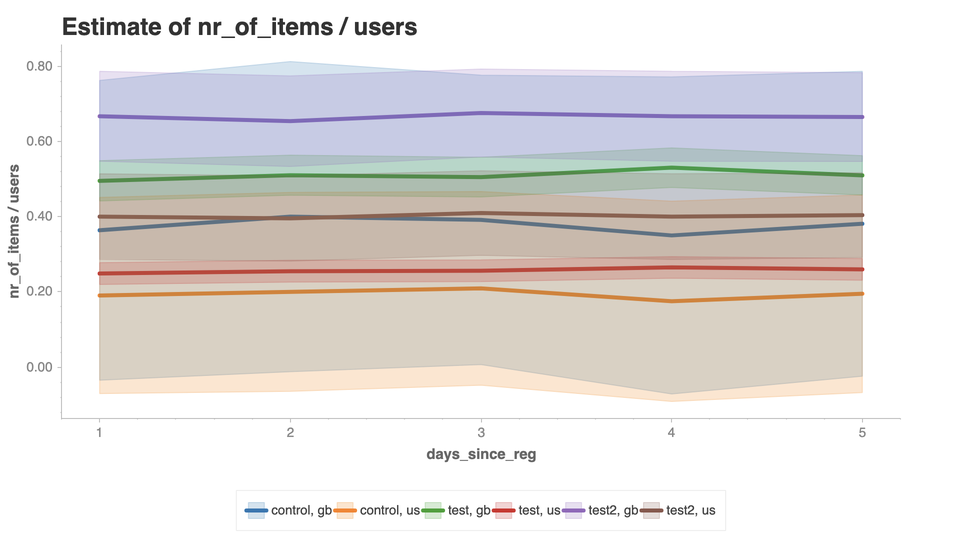

In [14]:
ztest_ord.summary_plot().show('png')

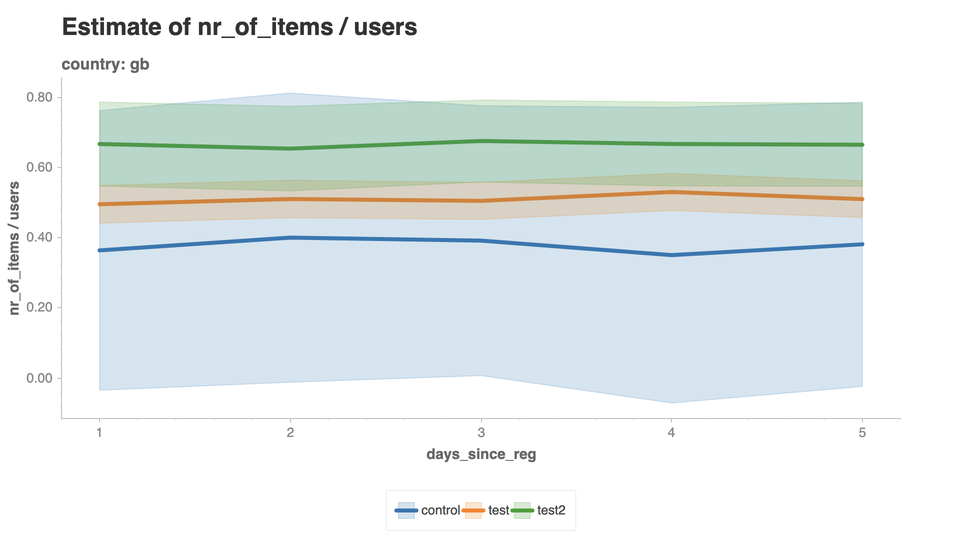

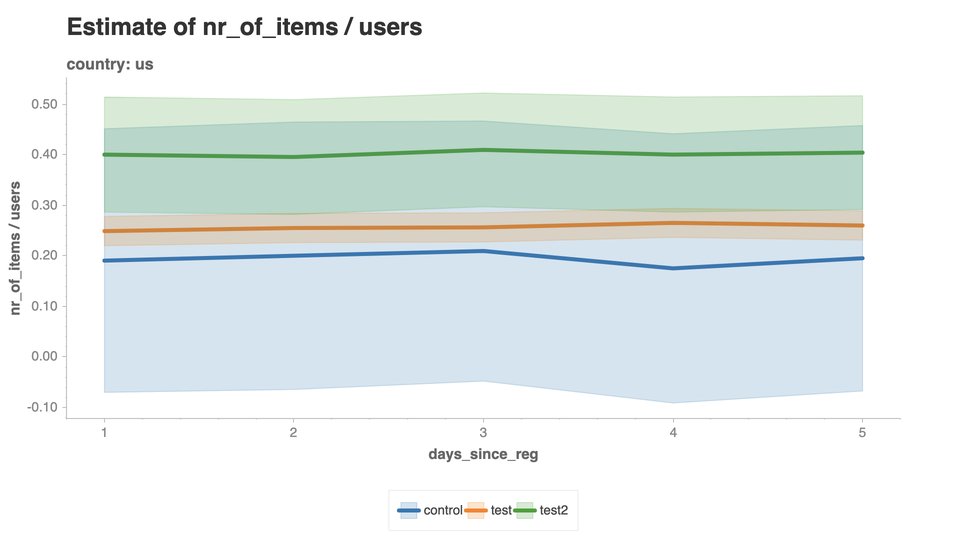

In [15]:
ztest_ord.summary_plot(groupby='country').show('png')

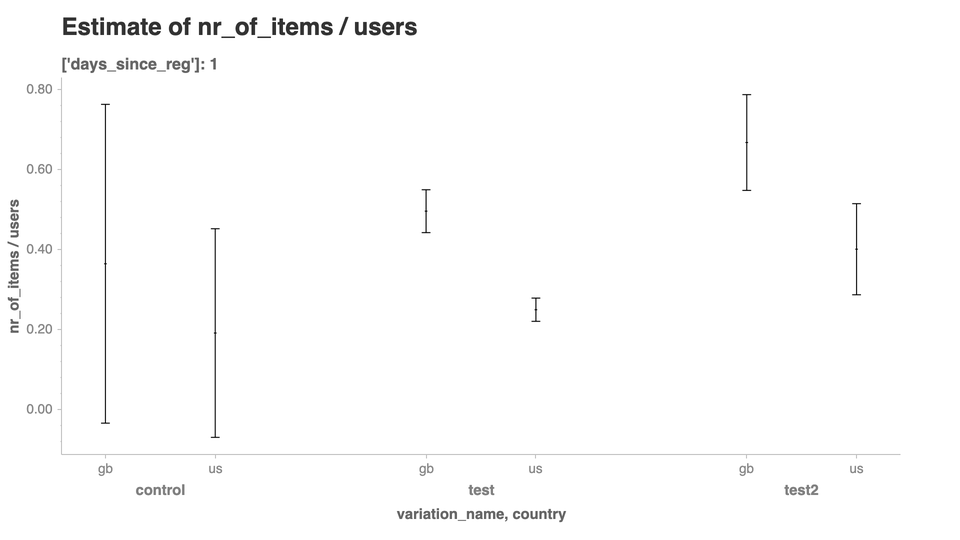

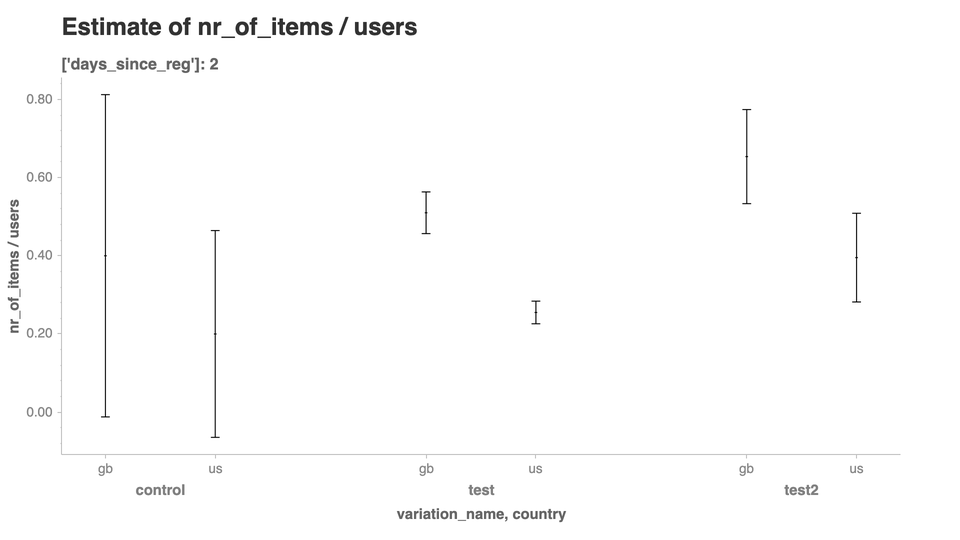

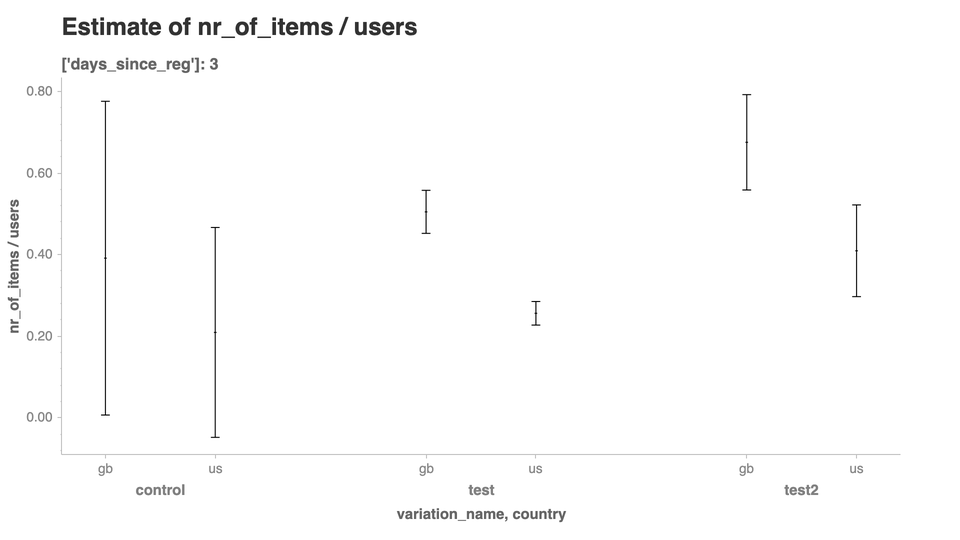

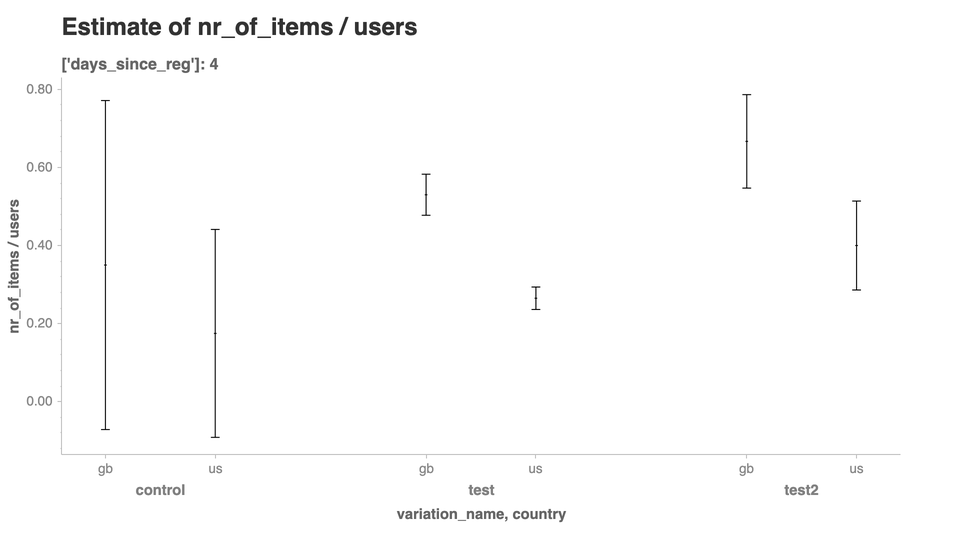

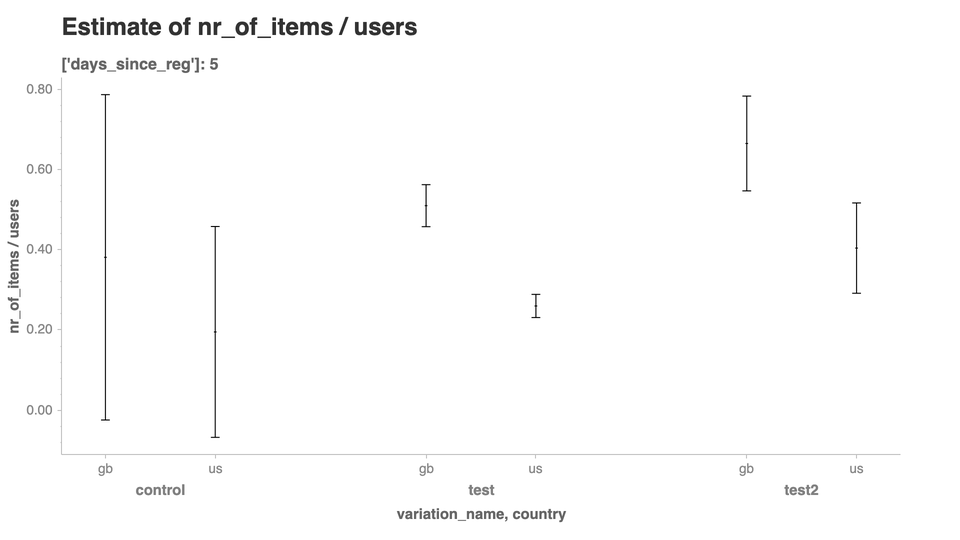

In [16]:
ztest_ord.summary_plot(groupby=['days_since_reg']).show('png')

In [17]:
ztest_ord.difference_plot(level_1=('control', 'us', 1), level_2=('test', 'us', 1)).show('html')

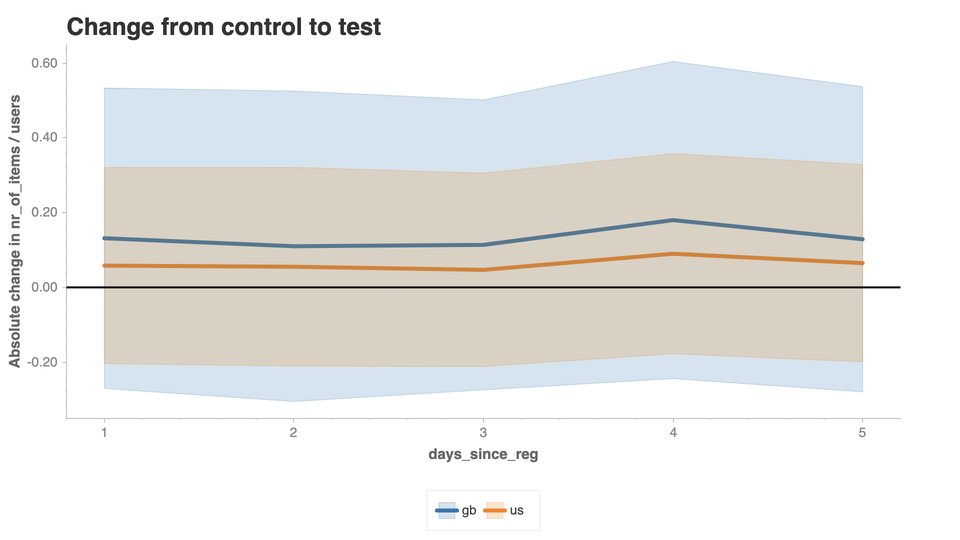

In [18]:
ztest_ord.difference_plot(level_1='control', level_2='test', groupby=['country','days_since_reg']).show('png')

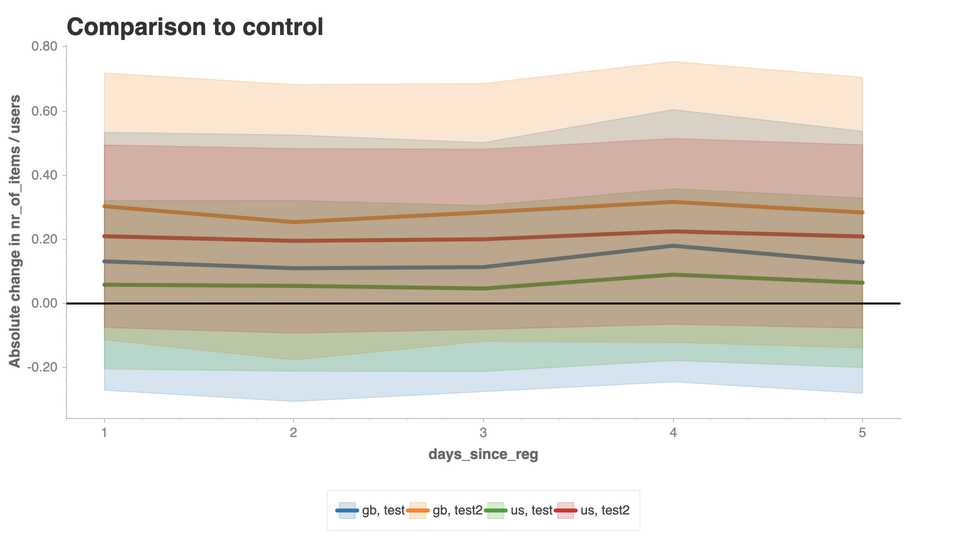

In [19]:
ztest_ord.multiple_difference_plot(level = 'control', 
                                   groupby=['country', 'days_since_reg'], 
                                   level_as_reference=True, 
                                   absolute=True).show('png')

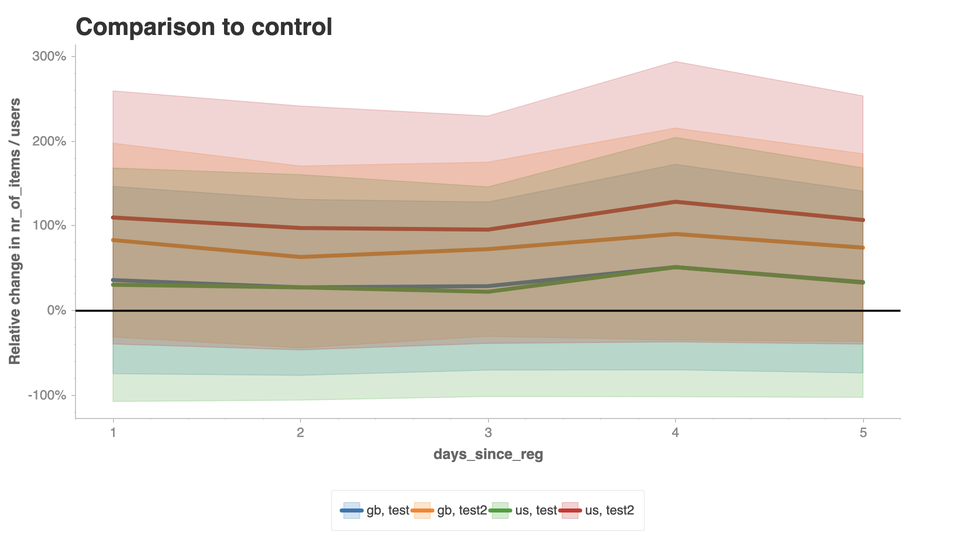

In [20]:
ztest_ord.multiple_difference_plot(level = 'control', 
                                   groupby=['country', 'days_since_reg'], 
                                   level_as_reference=True, 
                                   absolute=False).show('png')

### Non-inferiority margins

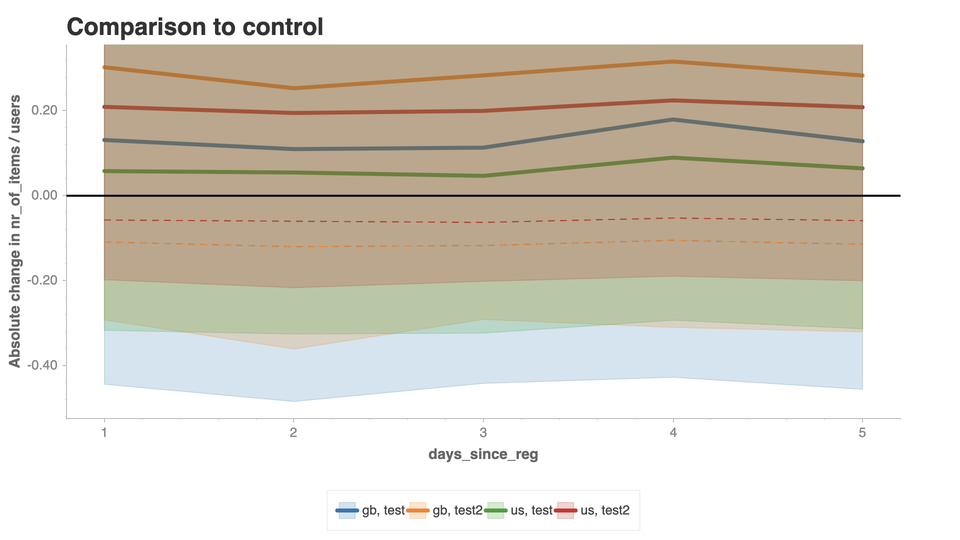

In [21]:
NIM = 'non-inferiority margin'
absolute = True
ztest_ord.multiple_difference_plot(level = 'control', 
                                   groupby=['country', 'days_since_reg'], 
                                   level_as_reference=True, 
                                   absolute=absolute, non_inferiority_margins=(0.3, 'increase'),
                                   use_adjusted_intervals=True).show('png')
diff = ztest_ord.multiple_difference(level = 'control', 
                                     groupby=['country', 'days_since_reg'], 
                                     level_as_reference=True, 
                                     absolute=absolute, non_inferiority_margins=(0.3, 'increase'))